# Détection du conducteur distrait

### Aperçu:

Conduire une voiture est une tâche complexe et nécessite une attention totale. La distraction au volant est toute activité qui détourne l'attention du conducteur de la route. La National Highway Traffic Safety Administration (NHTSA) a rapporté que 36750 personnes sont mortes dans des accidents de la route en 2018, dont 12% en raison d'une distraction au volant.<br>

De nombreux États ont maintenant des lois contre les textos, la conversation sur un téléphone portable et d'autres distractions au volant. Nous pensons que la vision par ordinateur peut augmenter les efforts des gouvernements pour prévenir les accidents causés par la distraction au volant. Notre algorithme détecte automatiquement l'activité distraite des conducteurs et les alerte. Nous envisageons que ce type de produit soit intégré dans les voitures pour aider les conducteurs à éviter les distractions.<br>

Nous avons pris le jeu de données StateFarm qui contient des instantanés d'une vidéo capturée par une caméra montée dans la voiture. L'ensemble d'apprentissage a ~ 22,4 K échantillons avec une distribution égale entre les classes et 79,7 K échantillons de test non étiquetés. Il existe 10 classes d'images:<br>

Il existe 10 classes comprenant une conduite sûre dans l'ensemble de données:<br>

c0 Conduire en toute sécurité.<br>
c1 Envoi de SMS (main droite).<br>
c2 Parler au téléphone (main droite).<br>
c3 Envoi de SMS (main gauche).<br>
c4 Parler au téléphone (main gauche).<br>
c5 Fonctionnement de la radio.<br>
c6 Boire.<br>
c7 Atteindre derrière.<br>
c8 Coiffure et maquillage.<br>
c9 Parler au (x) passager (s).<br>

Cet ensemble de données est disponible sur Kaggle, dans le cadre du concours State Farm: <br>
https://www.kaggle.com/c/state-farm-distraced-driver-detection

### Projet de détection des conducteurs de distraction
Dans ce cahier, j'utiliserai l'ensemble de données qui comprend des images de conducteurs tout en effectuant un certain nombre de tâches. Le but est d'identifier correctement si le conducteur est distrait de la conduite. Nous pourrions également souhaiter vérifier quelle activité la personne effectue.

Le cahier sera borken dans les étapes suivantes:

-Importez les bibliothèques. <br>
-Importez les ensembles de données.<br>
-Créez un modèle CNN end to end avec 2 classes c0 et c1 .<br> 
-Créez un modèle CNN end to end avec 10 classes .<br>
-Evaluer les deux models pour voir leurs précision.<br>
-Résultats .

### Importer les bibliothèques
J'utiliserai les bibliothèques Keras et Tensorflow pour créer un réseau neuronal convolutif. Donc, je vais importer les bibliothèques nécessaires pour faire de même

In [1]:
#importing libraries for the data processing and model.
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from keras.models import load_model
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os, glob, math, cv2, time
import numpy as np
from joblib import Parallel, delayed

In [2]:
# defining the path and classes.
directory = 'C:\\Users\\zouhri\\a\\PFA\\imgs\\train\\train'
test_directory = 'C:\\Users\\zouhri\\a\\PFA\\imgs\\test\\'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']


In [3]:
# defining a shape to be used for our models.
img_size1 = 300
img_size2 = 300

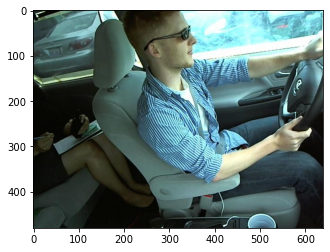

In [4]:
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break


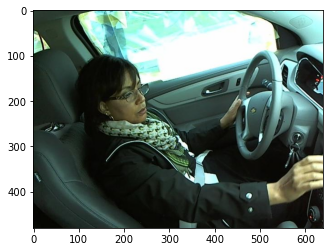

In [5]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    plt.imshow(RGB_img)
    plt.show()
    break

In [6]:
# checkking image size using shape.
print(img_array.shape)

(480, 640, 3)


(300, 300, 3)


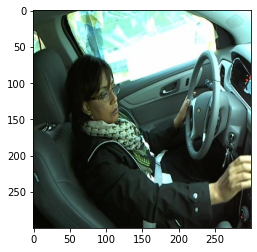

In [7]:
# trying out the resize image functionality
new_img = cv2.resize(test_array,(img_size1,img_size1))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [8]:
start = time.time()


    
end = time.time() - start
print("Time: %.2f seconds" % end)

Time: 0.00 seconds


In [9]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img = cv2.resize(RGB_img,(img_size1,img_size1))
            training_data.append([new_img,class_num])

In [10]:
start = time.time()

create_training_data()
    
end = time.time() - start
print("Time: %.2f seconds" % end)

Time: 148.13 seconds


In [11]:
print(len(training_data))


22424


In [12]:
random.shuffle(training_data)

In [13]:

x = []
y = []

for features, classes in training_data:
    x.append(features)
    y.append(classes)

In [14]:
len(x),len(y)

(22424, 22424)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50)




In [16]:
len(x_train) ,len(x_test)

(15696, 6728)

2
(300, 300, 3)


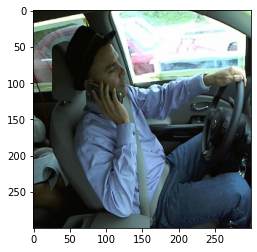

In [17]:
i = random.randint(1,376) # select any random index from 1 to 22420
plt.imshow( x_train[i] )
print(y_train[i])
print(x_train[i].shape)

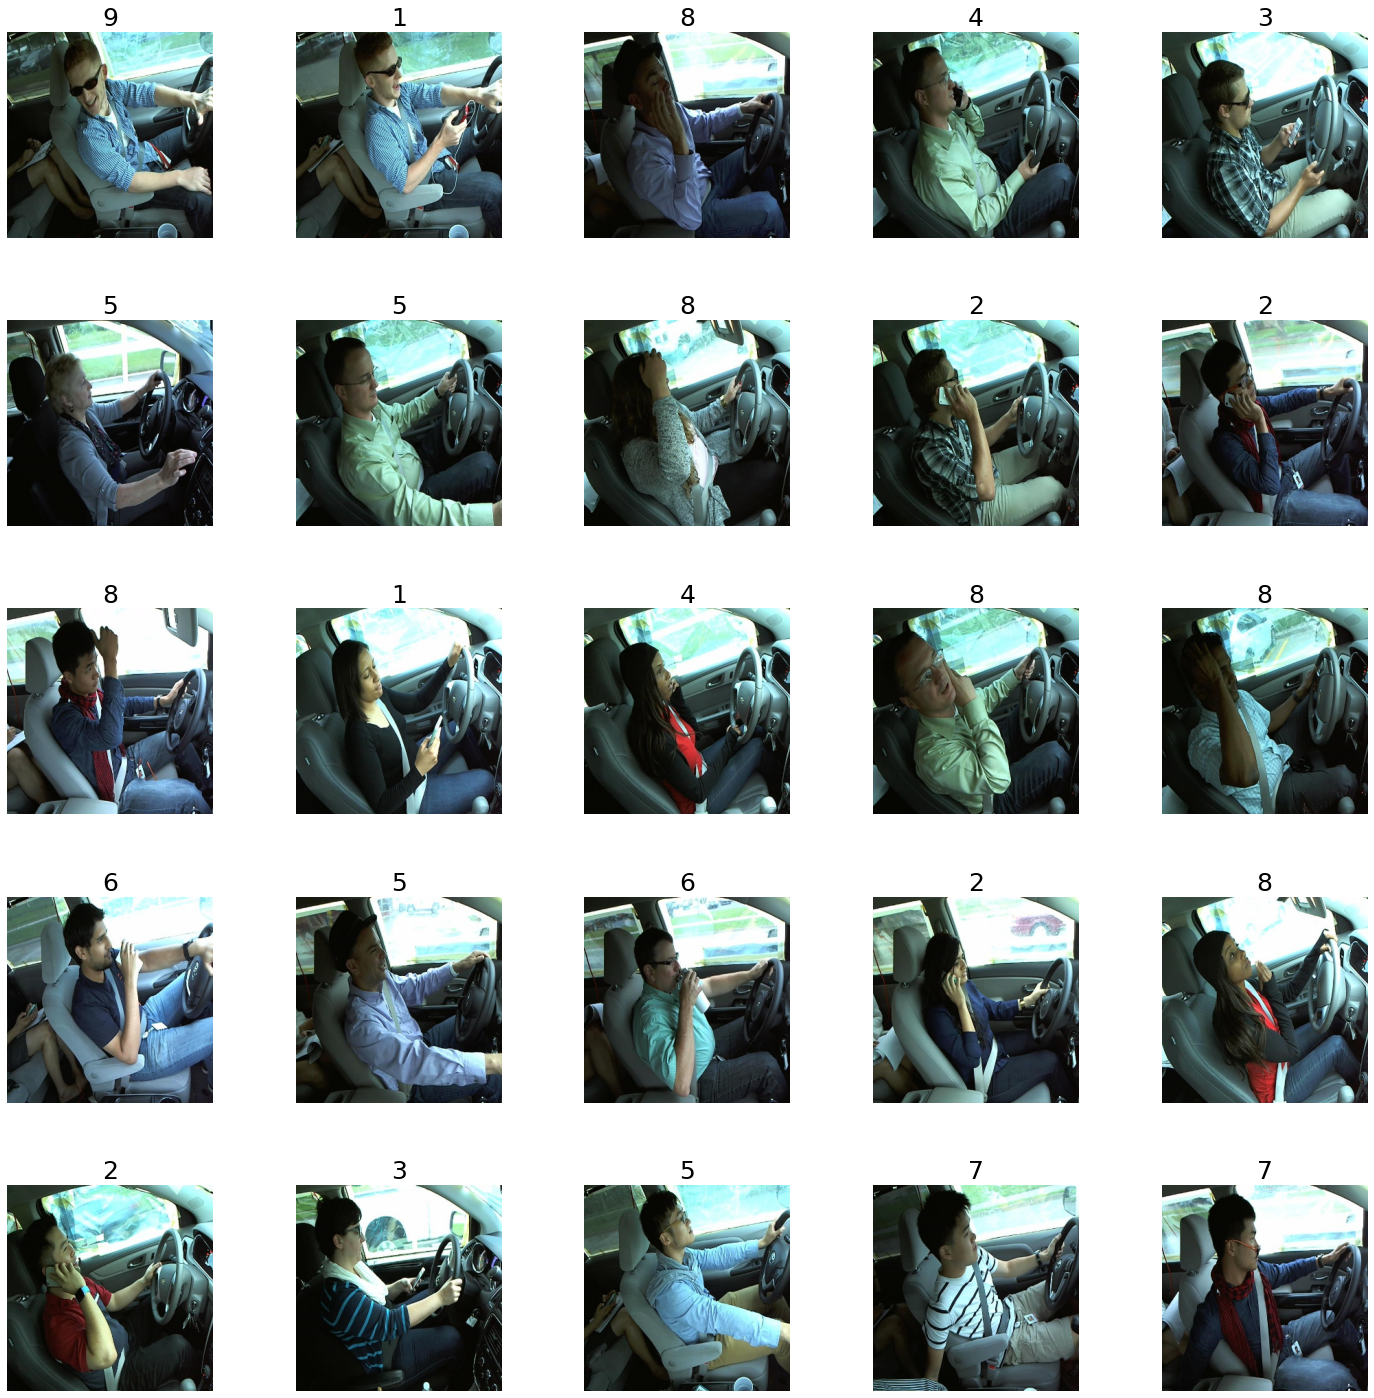

In [18]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( x_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [19]:

start = time.time()
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

    
end = time.time() - start
print("Time: %.2f seconds" % end)

Time: 18.00 seconds


In [20]:
print (x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(6728, 300, 300, 3)
(6728,)
(15696, 300, 300, 3)
(15696,)


In [21]:
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

In [22]:
print (x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(6728, 300, 300, 3)
(6728, 10)
(15696, 300, 300, 3)
(15696, 10)


(300, 300, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


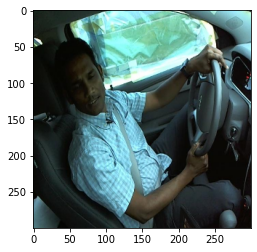

In [23]:
plt.imshow(x_train[20])
print(x_train[20].shape)
print(y_train[20])

In [24]:
import tensorflow as tf
import datetime, os
# Load the TensorBoard notebook extension
%load_ext tensorboard

Créer une stratégie pour distribuer les variables et le graphique
Comment fonctionne la stratégie tf.distribute.MirroredStrategy ?

- Toutes les variables et le graphique du modèle sont répliqués sur les répliques.<br>
- L'entrée est uniformément répartie sur les répliques.
- Chaque réplique calcule la perte et les gradients pour l'entrée reçue.
- Les dégradés sont synchronisés sur toutes les répliques en les additionnant.
- Après la synchronisation, la même mise à jour est effectuée sur les copies des variables sur chaque réplica.

## tf.distribute.MirroredStrategy
prend en charge la formation distribuée synchrone sur plusieurs GPU sur une machine. Il crée une réplique par périphérique GPU. Chaque variable du modèle est reflétée dans toutes les répliques. Ensemble, ces variables forment une seule variable conceptuelle appelée MirroredVariable . Ces variables sont synchronisées les unes avec les autres en appliquant des mises à jour identiques.

In [25]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [26]:
mirrored_strategy = tf.distribute.MirroredStrategy(
    cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


## MultiWorkerMirroredStrategy
tf.distribute.experimental.MultiWorkerMirroredStrategy est très similaire à MirroredStrategy . Il met en œuvre une formation distribuée synchrone sur plusieurs travailleurs, chacun avec potentiellement plusieurs GPU. Similaire à MirroredStrategy , il crée des copies de toutes les variables du modèle sur chaque appareil sur tous les travailleurs.

In [27]:
multiworker_strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/device:CPU:0',)
INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:CPU:0',), communication = CollectiveCommunication.AUTO


In [28]:
multiworker_strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy(
    tf.distribute.experimental.CollectiveCommunication.AUTO)

INFO:tensorflow:Using MirroredStrategy with devices ('/device:CPU:0',)
INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:CPU:0',), communication = CollectiveCommunication.AUTO


## CentralStorageStrategy
tf.distribute.experimental.CentralStorageStrategy effectue également un entraînement synchrone. Les variables ne sont pas mises en miroir, mais placées sur le processeur et les opérations sont répliquées sur tous les GPU locaux. S'il n'y a qu'un seul GPU, toutes les variables et opérations seront placées sur ce GPU.

Créez une instance de CentralStorageStrategy en:

In [29]:
central_storage_strategy = tf.distribute.experimental.CentralStorageStrategy()

INFO:tensorflow:ParameterServerStrategy (CentralStorageStrategy if you are using a single machine) with compute_devices = ['/job:localhost/replica:0/task:0/device:CPU:0'], variable_device = '/job:localhost/replica:0/task:0/device:CPU:0'


### Créer le modèle
Créez un modèle à l'aide de tf.keras.Sequential . Vous pouvez également utiliser l'API de sous-classification de modèle pour ce faire.

In [43]:
with strategy.scope():
    model = tf.keras.Sequential([
         tf.keras.layers.Conv2D(16,(5,5),activation='relu',input_shape=(300,300,3)),
         tf.keras.layers.BatchNormalization(),
         tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
         tf.keras.layers.Dropout(0.2),
         
         tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'),
         tf.keras.layers.BatchNormalization(),
         tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
         tf.keras.layers.BatchNormalization(axis = 3),
         tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
         tf.keras.layers.Dropout(0.3),
        
         tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
         tf.keras.layers.BatchNormalization(axis = 3),
         tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
         tf.keras.layers.BatchNormalization(axis = 3),
         tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
         tf.keras.layers.Dropout(0.4),
        
        
         tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
         tf.keras.layers.BatchNormalization(axis = 3),
         tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
         tf.keras.layers.BatchNormalization(axis = 3),
         tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
         tf.keras.layers.Dropout(0.4),
        
        
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(units = 128,activation='relu'),
         tf.keras.layers.Dense(units = 128,activation='relu'),
         tf.keras.layers.Dropout(0.5),
         
         tf.keras.layers.Dense(10,activation='softmax')
     ])
        
    model.compile(loss='categorical_crossentropy',metrics=['accuracy','Precision'],optimizer='adam')
        

In [44]:
# Define the checkpoint directory to store the checkpoints

checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

In [45]:
logdir = os.path.join("logss", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 296, 296, 16)      1216      
_________________________________________________________________
batch_normalization_17 (Batc (None, 296, 296, 16)      64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 148, 148, 16)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 148, 148, 16)      2320      
_________________________________________________________________
batch_normalization_18 (Batc (None, 148, 148, 16)      64        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 148, 148, 32)     

In [47]:
start = time.time()
results = model.fit(x_train,y_train,batch_size=64,epochs=15,verbose=1,validation_data=(x_test,y_test),callbacks=[tensorboard_callback])
  
end = time.time() - start
print("Time: %.2f seconds" % end)

Epoch 1/15
246/246 [==============================] - 2934s 12s/step - loss: 2.5196 - accuracy: 0.2665 - precision: 0.5324 - val_loss: 1.5674 - val_accuracy: 0.4400 - val_precision: 0.7690
Epoch 2/15
246/246 [==============================] - 2935s 12s/step - loss: 1.4040 - accuracy: 0.4927 - precision: 0.7874 - val_loss: 1.1047 - val_accuracy: 0.5927 - val_precision: 0.8349
Epoch 3/15
246/246 [==============================] - 3105s 13s/step - loss: 1.0622 - accuracy: 0.6354 - precision: 0.8569 - val_loss: 0.9665 - val_accuracy: 0.6573 - val_precision: 0.8783
Epoch 4/15
246/246 [==============================] - 3672s 15s/step - loss: 0.8018 - accuracy: 0.7309 - precision: 0.9159 - val_loss: 0.7153 - val_accuracy: 0.7444 - val_precision: 0.9318
Epoch 5/15
246/246 [==============================] - 4579s 19s/step - loss: 0.6836 - accuracy: 0.7655 - precision: 0.9433 - val_loss: 0.6876 - val_accuracy: 0.7604 - val_precision: 0.9427
Epoch 6/15
246/246 [==============================] - 3

In [48]:
model.save_weights('./model300.h5', overwrite=True)
model.save('./model300.h5')

In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
%tensorboard --logdir logss


Reusing TensorBoard on port 6006 (pid 13076), started 5 days, 21:46:21 ago. (Use '!kill 13076' to kill it.)

In [163]:
model = Sequential()

In [168]:
model = Sequential()
## CNN 1
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.2))

## CNN 2
model.add(Conv2D(32,(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.3))

## CNN 3
model.add(Conv2D(64,(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.4))


## Dense & Output
model.add(Flatten())
model.add(Dense(units = 128,activation='relu'))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [169]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
batch_normalization_30 (Batc (None, 98, 98, 16)        64        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
batch_normalization_31 (Batc (None, 47, 47, 32)        128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 45, 45, 32)       

In [170]:
model.compile(loss='BinaryCrossentropy',metrics=['binary_accuracy','AUC','Precision'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_accuracy',patience=3)]

batch_size = 64

In [ ]:
results = model.fit(x_train,y_train,batch_size=batch_size,epochs=5,verbose=1,validation_data=(x_test,y_test),callbacks=callbacks)


 Available metrics are: 
 loss,
binary_accuracy
,auc
,binary_crossentropy,
precision,
recall
,val_loss,
val_binary_accuracy
,val_auc,
val_binary_crossentropy
,val_precision
,val_recall

In [149]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))
# get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

141/141 [==============================] - 15s 109ms/step - loss: 0.1059 - accuracy: 0.9721 - precision: 0.9747
Test Accuracy : 0.972
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [150]:
model.evaluate(x_test,y_test)

141/141 [==============================] - 15s 109ms/step - loss: 0.1059 - accuracy: 0.9721 - precision: 0.9747


[0.10591956228017807, 0.9721293449401855, 0.9746807217597961]

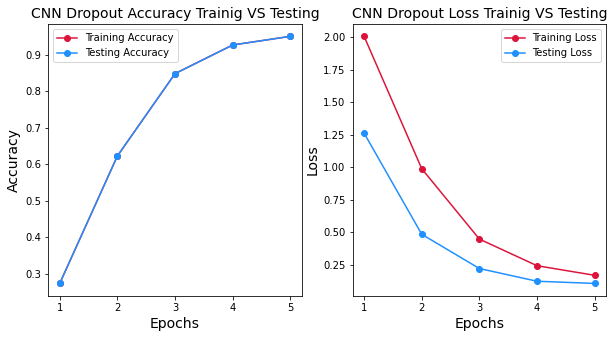

In [152]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(results.history['accuracy']) + 1), results.history['accuracy'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(results.history['val_accuracy']) + 1), results.history['accuracy'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('Accuracy',fontsize = 14)
axes[0].set_title('CNN Dropout Accuracy Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(results.history['loss']) + 1), results.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(results.history['val_loss']) + 1), results.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('CNN Dropout Loss Trainig VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

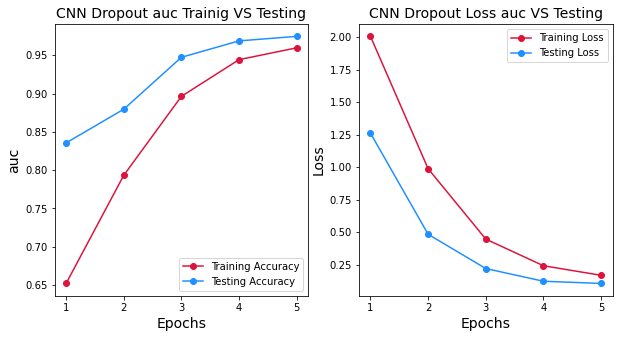

In [162]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(results.history['precision']) + 1), results.history['precision'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(results.history['val_precision']) + 1), results.history['val_precision'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('auc',fontsize = 14)
axes[0].set_title('CNN Dropout auc Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(results.history['loss']) + 1), results.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(results.history['val_loss']) + 1), results.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('CNN Dropout Loss auc VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

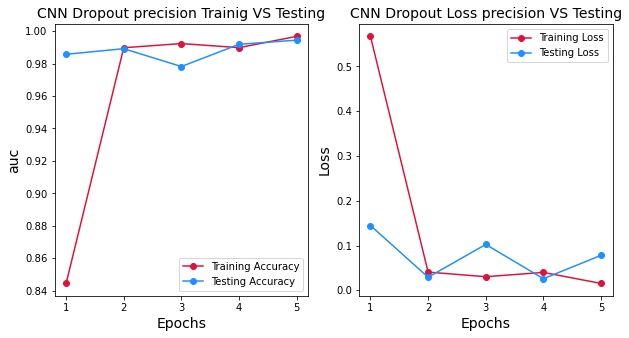

In [59]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(results.history['precision']) + 1), results.history['precision'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(results.history['val_precision']) + 1), results.history['val_precision'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('auc',fontsize = 14)
axes[0].set_title('CNN Dropout precision Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(results.history['loss']) + 1), results.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(results.history['val_loss']) + 1), results.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('CNN Dropout Loss precision VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

In [79]:
model.save_weights('./modelc3c6200.h5', overwrite=True)
model.save('./modelc3c6200.h5')

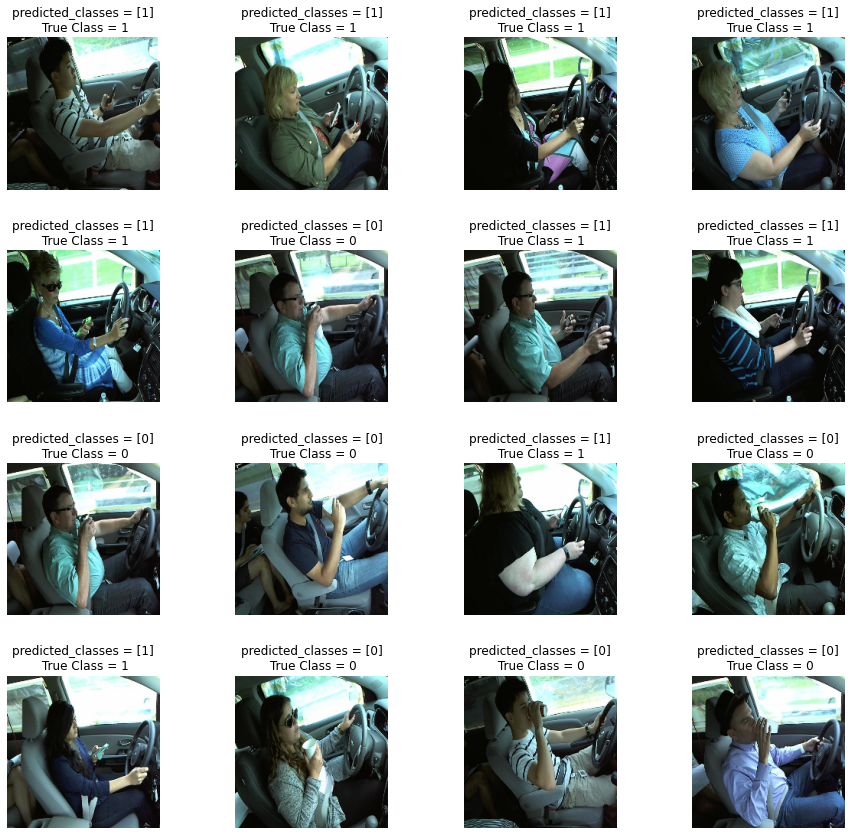

In [60]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("predicted_classes = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)


# axes[i].set_title("Guess{}\n True{}".format(predicted_class[i], y_test[i]))

In [61]:
# Model evaluation
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.58%


In [62]:
# get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

In [63]:
predicted_classes.shape

(775, 1)

In [64]:
y_test.shape

(775,)

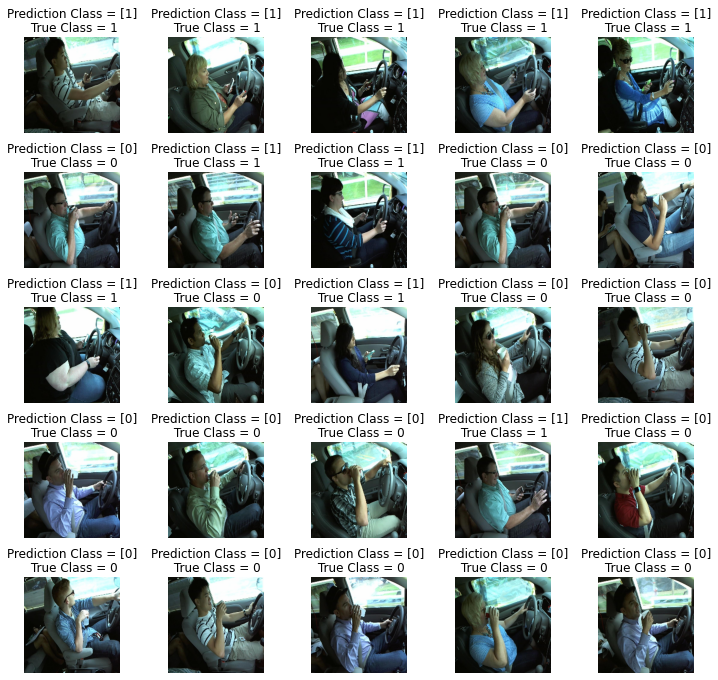

In [66]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# axes[i].set_title("Guess{}\n True{}".format(predicted_class[i], y_test[i]))

In [71]:
test_directory = 'C:\\Users\\zouhri\\a\\PFA\\deux classes\\test'

In [81]:
model = tf.keras.models.load_model('./modelc3c6200.h5')

## Predict

In [107]:
pred= model.predict_classes(x_test)

## Confusion Matrix


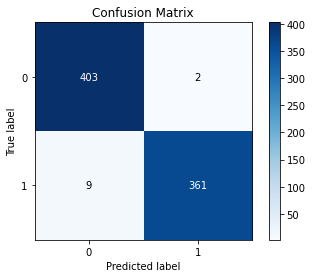

In [108]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

## Classification Report

In [109]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       405
           1       0.99      0.98      0.98       370

    accuracy                           0.99       775
   macro avg       0.99      0.99      0.99       775
weighted avg       0.99      0.99      0.99       775



In [14]:
test_directory = 'C:\\Users\\zouhri\\a\\PFA\\deux classes\\test'

In [15]:
# Creating a test dataset.
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_img = cv2.resize(RGB_img ,(200,200))
        testing_data.append([new_img])

In [16]:
create_testing_data()
print(len(testing_data))

72


In [17]:
model = tf.keras.models.load_model('./modelc3c6200.h5')

In [18]:
test = []

for img in testing_data:
    test.append(img)
    


test = np.array(test).reshape(-1,200,200,3)
prediction = model.predict(test)

In [19]:
prediction[0]

array([2.5279672e-12], dtype=float32)